In [3]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt

Two tests to determine false positives (in this notebook):
* Pixel by pixel lightcurve plot
* In and out of transit flux comparison

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

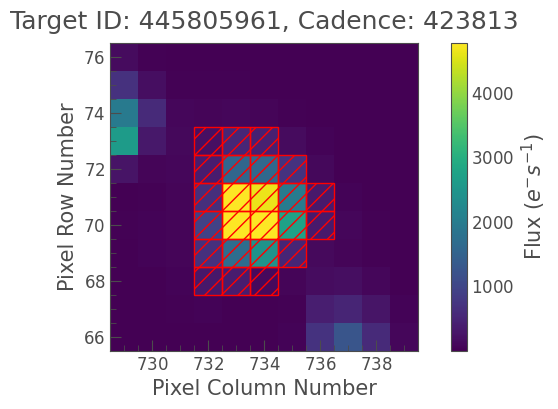

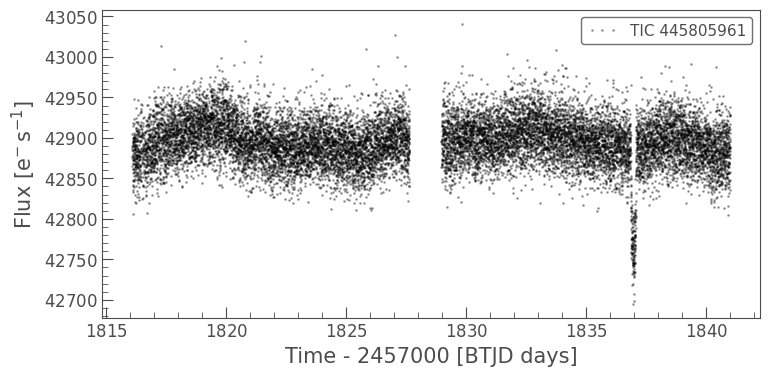

In [4]:
TIC = 'TIC 445805961'
search_result = lk.search_targetpixelfile(TIC, author = "SPOC", sector = 19)
tpf = search_result.download()
tpf.plot(aperture_mask = 'pipeline')

sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19) # Get lightcurve and pixel file data for the same target and sector
lc = sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

Each pixel/box is a representation of light at that point. Yellow = more light (star = yellow) -> inside the aperture
The lightcurve shows the curve for each individual pixel

In [ ]:
def plot_pixel_level_LC(bkg_list, tpf_list, arrshape_list, t_list, transit_list, ql = False):
    for idx, X1_original in enumerate(tpf_list): # Plot each transit
        bkg = np.flip(bkg_list[idx], axis = 0)
        arrshape = arrshape[idx]
        peak = transit_list[idx]
        tpf = tpf_list[idx]

        s = X1_original.shape
        X1 = X1_original.reshape(s[0], s[1] * s[2])

        T0 = transit_list[idx] # Time of the transit (or transit-like) event
        t = t_list[idx] # time array

        intr = abs(T0 - t) < 0.25 # creatre a mask of the in-transit times
        oot = (abs(T0 - t) < 0.5) * (abs(T0 - t) < 0.3) # Create a mask of the out of transit times

        fig, ax = plt.subplots(arrshape[i], arrshape[2], sharex = True, sharey = False, gridspec_kw = )

Light curve ^^ extracted for each individual pixel
Manually specify the transit event
The transit event needs to be on the central pixel (where the target star is) for it to be a transiting exoplanet
As long as there are no clear dips or spikes on the other pixels, it doesn't matter the size of the dip on the central pixel

## Asteroid transit example

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

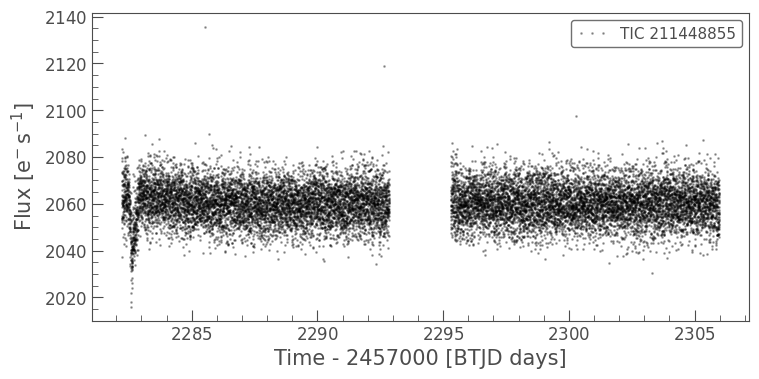

In [5]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

TIC = 'TIC 211448855'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 36)
lc = sector_data.download()
search_result = lk.search_targetpixelfile(TIC, author = "SPOC", sector = 36)
tpf = search_result.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

In [7]:
transit_list = [2283.63]
t_list = [tpf.time.value]
tpf_list = [tpf.flux.value]
bkg_list = [np.nanmean(tpf.flux.value, axis = 0)]
arrshape_list = [tpf.flux.shape]

def plot_pixel_level_LC(bkg_list, tpf_list, arrshape_list, t_list, transit_list, ql = False):
    for idx, X1_original in enumerate(tpf_list): # Plot each transit
        bkg = np.flip(bkg_list[idx], axis = 0)
        arrshape = arrshape[idx]
        peak = transit_list[idx]
        tpf = tpf_list[idx]

        s = X1_original.shape
        X1 = X1_original.reshape(s[0], s[1] * s[2])

        T0 = transit_list[idx] # Time of the transit (or transit-like) event
        t = t_list[idx] # time array

        intr = abs(T0 - t) < 0.25 # creatre a mask of the in-transit times
        oot = (abs(T0 - t) < 0.5) * (abs(T0 - t) < 0.3) # Create a mask of the out of transit times

        fig, ax = plt.subplots(arrshape[i], arrshape[2], sharex = True, sharey = False, gridspec_kw = )

plot_pixel_level_LC(bkg_list, tpf_list, arrshape_list, t_list, transit_list)

SyntaxError: invalid syntax (333085208.py, line 23)

In this pixel lightcurve, there's a large number of dips/spikes outside of the yellow pixel -> it should be ruled out

However, the classifier in Star Sailors will attempt to determine the type of object (orbital period, radius, etc) and if confirmed (verified by the collective playerbase like in a blockchain), the object would change from being a planet type to an asteroid object (for example)